## Initializing and Loading Data

In [138]:
file_location = "../Datasets/TMDB_movie_dataset_v11.csv"

In [139]:
import pandas as pd
import numpy as np

In [140]:
backup = pd.read_csv(file_location)

### Backup

In [141]:
data = backup.copy(deep=True)

## Initial Data Cleaning

In [142]:
initial = len(data)
before = initial
initial

1104439

### Getting rid of duplicate rows

In [143]:
data = data.drop_duplicates()
after = len(data)
print(f"Removed {(before - after)} duplicate rows. {after} rows left.")
before = after

Removed 366 duplicate rows. 1104073 rows left.


### Removing unreleased movies

The status column shows what stage of production the movie is in. We are only concerned with movies that have been released.

In [144]:
data.status.value_counts()

status
Released           1080967
In Production         8753
Post Production       7412
Planned               6321
Rumored                323
Canceled               297
Name: count, dtype: int64

Getting rid of unreleased movies:

In [145]:
data = data[data['status'] == "Released"]
after = len(data)
print(f"Removed {before - after} unreleased movies. {after} rows left.")
before = after

Removed 23106 unreleased movies. 1080967 rows left.



The release date of some rows are in the future, even though they are marked as `'Released'`. `release_date` is currently an `object` type and needs to be converted to a `datetime` type to be handled.

In [146]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.release_date.describe()

count                           924375
mean     1999-11-03 19:22:06.237079040
min                1800-01-01 00:00:00
25%                1989-01-01 00:00:00
50%                2010-07-30 00:00:00
75%                2018-10-15 00:00:00
max                2061-12-07 00:00:00
Name: release_date, dtype: object

Dropping all movies with a release date in the future:

In [147]:
from datetime import date
today = pd.to_datetime(date.today())
data = data[data['release_date'] < today]
after = len(data)
print(f"Removed {before - after} future movies. {after} rows left.")
before = after

Removed 156673 future movies. 924294 rows left.


In [148]:
data.release_date.describe()

count                           924294
mean     1999-11-02 22:36:37.311245184
min                1800-01-01 00:00:00
25%                1989-01-01 00:00:00
50%                2010-07-30 00:00:00
75%                2018-10-14 00:00:00
max                2024-11-21 00:00:00
Name: release_date, dtype: object

Now the status column can be dropped.

In [149]:
data = data.drop(columns='status')
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

### Removing porn

The `adult` column designates if a row is an adult film. These will be dropped:

In [150]:
data = data[data['adult'] == False]
after = len(data)
print(f"Removed {before - after} adult films. {after} rows left.")
before = after

Removed 91414 adult films. 832880 rows left.


### Getting rid of duplicate IDs

In [151]:
print(f"There are {before - data.id.nunique()} rows with a repeated id.")

There are 7 rows with a repeated id.


Lower indexed entries are more up-to-date and more complete. Removing rows with duplicated IDs, only keeping the first occurance.

In [152]:
data = data.drop_duplicates(subset=['id'], keep='first')
after = len(data)
print(f"Removed {before - after} duplicate IDs. {after} rows left.")
before = after

Removed 7 duplicate IDs. 832873 rows left.


In [153]:
data.id.nunique()

832873

### Dropping unusable columns

Checking columns:

In [154]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

In [155]:
data[['backdrop_path', 'homepage', 'poster_path']].describe()

,backdrop_path,homepage,poster_path
count,256526,100465,626314
unique,254413,94839,622922
top,/3CxwYgqGtJ6UEGfWUT0gMYCIlFP.jpg,https://animation.geidai.ac.jp,/wtoKLMm4UvkwvcSwO3XWcs1gJuF.jpg
freq,157,147,54


The `backdrop_path`, `homepage`, and `poster_path` columns do not contain any useful data. These can be dropped.

In [156]:
data = data.drop(columns=['backdrop_path', 'homepage', 'poster_path'])
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Analyzing Columns

In [157]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

### `title`

In [158]:
data.title.describe()

count     832869
unique    717071
top         Home
freq         124
Name: title, dtype: object

In [159]:
data['title'].sample(5)

803622                                Listen
1064944                                 1987
409687                            Desajonado
401752                             The Wound
514660     Dream Boy or the Pursuit of Being
Name: title, dtype: object

### `vote_average`

In [160]:
data.vote_average.describe()

count    832873.000000
mean          2.320314
std           3.148997
min           0.000000
25%           0.000000
50%           0.000000
75%           5.400000
max          10.000000
Name: vote_average, dtype: float64

<Axes: ylabel='Frequency'>

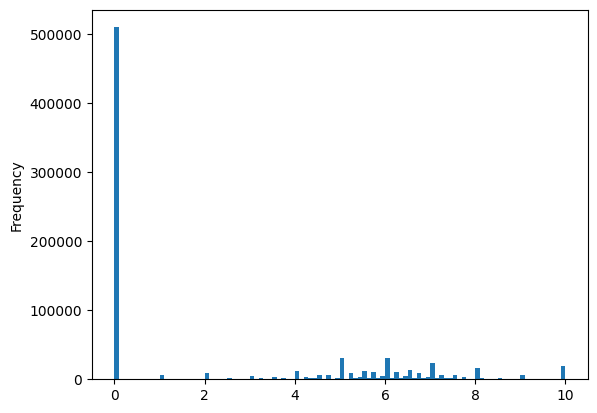

In [161]:
data.vote_average.plot.hist(bins=100)

There are an overwhelmingly large amount of $0.0$ vote averages. This is because they have $0$ `vote_count`. It's inappropriate to consider a movie with no votes to be $0.0$ on a $1\text{-}10$ scale that does not permit $0$. These should be replaced with `NaN`.

<Axes: ylabel='Frequency'>

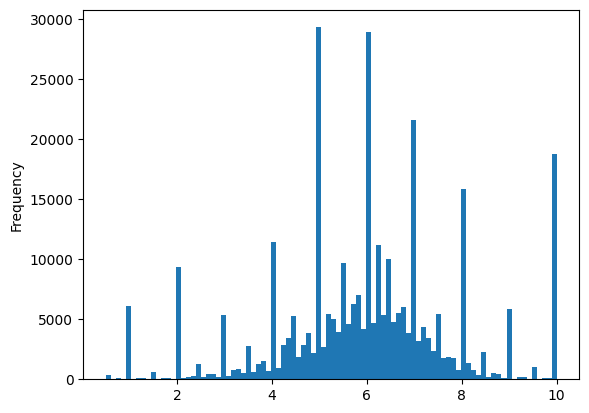

In [162]:
data.vote_average.replace(0, np.nan, inplace=True)
data.vote_average.plot.hist(bins=90)

In [163]:
scoredNoVotes = data.query('vote_count == 0 and vote_average != 0')
print(f"Amount of movies with no votes but have a vote average anyway: {len(scoredNoVotes)}")
scoredNoVotes.sample()

Amount of movies with no votes but have a vote average anyway: 509676


,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
1044783,639594,Sida d'ici et de là-bas,NaN,0,1998-01-01,0,52,False,0,tt0176138,fr,Sida d'ici et de là-bas,NaN,0.6,NaN,Documentary,NaN,Belgium,French,NaN


There are some movies with $0$ `vote_count` but with a real `vote_average`.

### `vote_count`

In [164]:
data.vote_count.describe()

count    832873.000000
mean         25.700116
std         371.852551
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       34495.000000
Name: vote_count, dtype: float64

<Axes: ylabel='Frequency'>

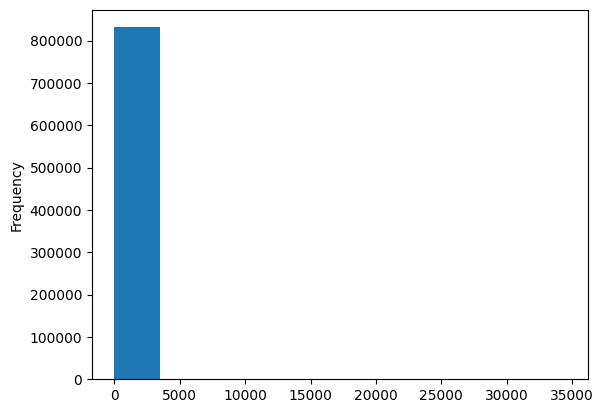

In [165]:
data.vote_count.plot.hist()

Most movies only have a handful of votes, while others can have tens of thousands.

### `release_date`

In [166]:
type(data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: >

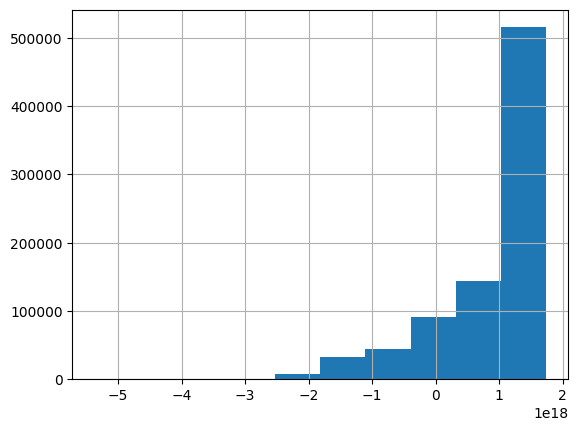

In [167]:
pd.to_numeric(data['release_date']).hist()

As expected the majority of movies are recent.

In [168]:
data[data['release_date'] == data['release_date'].min()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
702570,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.6,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN


There are movies with improperly recorded dates.

In [169]:
data[data['release_date'] < pd.to_datetime('1900-01-01')].sort_values('release_date').head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
702570,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.600,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN
605145,1233885,A Farsa de Inês Pereira,NaN,0,1800-09-11,0,56,False,0,NaN,pt,A Farsa de Inês Pereira,The farsades of ines pereira by the goat of my...,0.600,NaN,NaN,NaN,NaN,Portuguese,NaN
640928,1314804,Kaskisavun mailta,NaN,0,1837-10-29,0,14,False,0,NaN,en,Kaskisavun mailta,Finnish short documentary,0.651,NaN,NaN,NaN,Finland,Finnish,NaN
289005,1181748,Felix Nadar Spinning in his Chair,10.0,1,1865-01-01,0,1,False,0,NaN,en,Felix Nadar Spinning in his Chair,Revolving portrait of French photographer Feli...,1.162,NaN,Documentary,NaN,France,NaN,NaN
585283,1256924,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,NaN,en,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.000,The frames that spun!,NaN,NaN,NaN,NaN,NaN


Luckily there are only a handful of these. The first legitimate film is in 1865, anything claiming to be older will be removed.

In [170]:
data = data[data['release_date'] >= pd.to_datetime('1865-01-01')]

### `revenue`

In [171]:
data.revenue.describe()

count    8.328700e+05
mean     8.841882e+05
std      1.966081e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+09
Name: revenue, dtype: float64

In [172]:
data.revenue.info()

<class 'pandas.core.series.Series'>
Index: 832870 entries, 0 to 1104437
Series name: revenue
Non-Null Count   Dtype
--------------   -----
832870 non-null  int64
dtypes: int64(1)
memory usage: 12.7 MB


In [173]:
revenue_sorted = data.sort_values('revenue')
revenue_sorted.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
181816,339294,Some Bears,7.0,2,2013-05-15,-12,8,False,12,NaN,en,Some Bears,A young man slips into a world of delusion aft...,0.600,"Bears, known in the wild for their cuddliness",NaN,NaN,United States of America,English,NaN
104592,200862,Vigil in the Night,6.8,6,1940-02-05,0,102,False,0,tt0033221,en,Vigil in the Night,A good nurse ruins her career by covering up f...,2.494,"""IT TAKES A LOT TO MAKE ME LOVE A MAN In The F...",Drama,RKO Radio Pictures,United States of America,English,"night shift, self sacrifice, nurse, isolation,..."
1083636,708698,The Sky's the Limit - The Eclipse of Star Trek...,NaN,0,2014-12-02,0,87,False,0,tt4225298,en,The Sky's the Limit - The Eclipse of Star Trek...,Newly-produced feature-length documentary expl...,0.849,NaN,Documentary,NaN,NaN,NaN,NaN
1083637,708699,Amunet,NaN,0,2019-11-13,0,20,False,30000,tt11374282,en,Amunet,"A young working girl, Ayesha, moves in to anot...",0.602,NaN,Horror,NaN,United Arab Emirates,English,NaN
1083638,708701,Respect: A Felix Dexter Special,NaN,0,2013-11-17,0,30,False,0,tt3338098,en,Respect: A Felix Dexter Special,A special programme celebrating the life in co...,0.617,NaN,Documentary,BBC,United Kingdom,English,NaN


In [174]:
revenue_sorted.tail()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
282,76600,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,192,False,460000000,tt1630029,en,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,"dying and death, loss of loved one, alien life..."
15,299534,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,181,False,356000000,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac..."
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
600516,1224207,Adventures in Bora Bora,NaN,0,2023-08-23,3000000000,5,False,800000000,NaN,en,Adventures in Bora Bora,"The adventures in Bora Bora, is an astonishing...",0.000,(English),"Horror, War",NaN,NaN,English,NaN
337620,1270893,TikTok Rizz Party,10.000,1,2024-04-01,3000000000,180,False,250000000,NaN,en,TikTok Rizz Party,"a band of brothers, torn apart by the constant...",0.000,NaN,"Drama, Comedy",Warner Bros.,United States of America,NaN,"party, tiktok, rizz"


Most films have no revenue, but there are many highly grossing films.

### `runtime`

In [175]:
data.runtime.describe()

count    832870.000000
mean         48.500552
std          59.492516
min           0.000000
25%           3.000000
50%          30.000000
75%          89.000000
max       14400.000000
Name: runtime, dtype: float64

In [176]:
data.runtime.info()

<class 'pandas.core.series.Series'>
Index: 832870 entries, 0 to 1104437
Series name: runtime
Non-Null Count   Dtype
--------------   -----
832870 non-null  int64
dtypes: int64(1)
memory usage: 12.7 MB


In [177]:
zero_runtime = data[data['runtime'] == 0]
print(f"There are {len(zero_runtime)} movies with zero runtime.")

There are 180696 movies with zero runtime.


Many movies have their runtime listed as zero. These will be considered missing data.

In [178]:
data.runtime = data.runtime.replace(0, np.nan)

<Axes: ylabel='Frequency'>

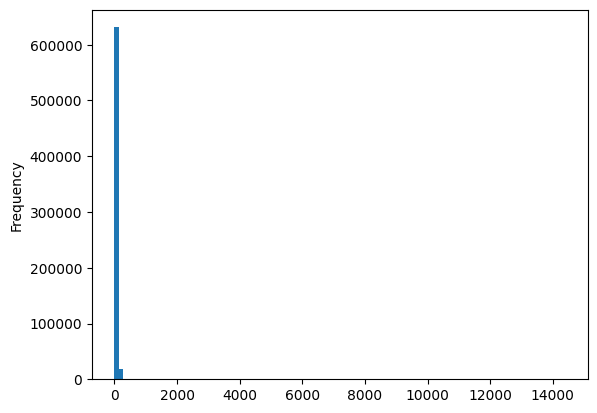

In [179]:
data.runtime.plot.hist(bins=100)

There are a few strong outliers.

<Axes: ylabel='Frequency'>

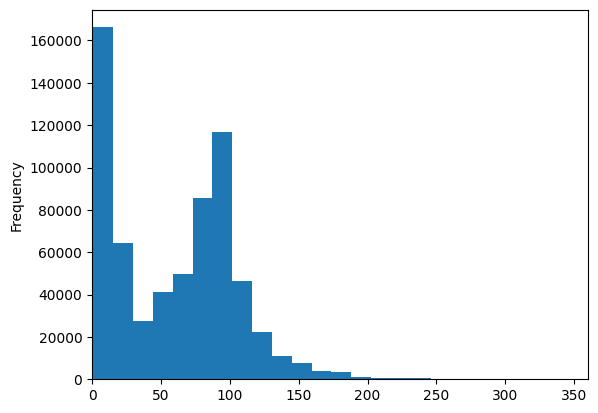

In [180]:
data.runtime.plot.hist(bins=1000, xlim=(0, 360))

### `budget`

In [181]:
data.budget.describe()

count    8.328700e+05
mean     3.369057e+05
std      5.246749e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.880000e+08
Name: budget, dtype: float64

In [182]:
data.budget.info()

<class 'pandas.core.series.Series'>
Index: 832870 entries, 0 to 1104437
Series name: budget
Non-Null Count   Dtype
--------------   -----
832870 non-null  int64
dtypes: int64(1)
memory usage: 12.7 MB


## Exporting

In [183]:
data.to_csv('../Datasets/clean.csv')